# Data loading:

# Github link: <https://github.com/Lee-Anne22/Student-Study-Habits---Further-Insights-and-Trends>

# Data Collection and Preparation

## Collection of Data:

The data collected for this project is provided by Kaggle and thorough
preparation of this data were done for machine learning models.

First, a library import function is created to import all necessary
libraries.

In [1]:
#Importing all necessary programs
def import_study_libs():
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go
    import plotly.io as pio
    import sklearn as sk
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    from sklearn.exceptions import NotFittedError
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import plot_tree
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import make_scorer
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    import lime as lime
    import lime.lime_tabular
    import shap as shap
    from IPython.display import Image
    return {"np": np, "pd": pd, "sns": sns, "plt": plt, "go": go, "pio": pio, "sk": sk, "MinMaxScaler": MinMaxScaler, "StandardScaler": StandardScaler, "RFE": RFE, "LinearRegression": LinearRegression, "NotFittedError": NotFittedError, "sm": sm, "variance_inflation_factor": variance_inflation_factor, "train_test_split": train_test_split, "GridSearchCV": GridSearchCV, "StratifiedKFold": StratifiedKFold,
            "DecisionTreeClassifier": DecisionTreeClassifier, "plot_tree": plot_tree, "accuracy_score": accuracy_score, "confusion_matrix": confusion_matrix, "roc_curve": roc_curve, "roc_auc_score": roc_auc_score, "mean_squared_error": mean_squared_error, "mean_absolute_error": mean_absolute_error, "r2_score": r2_score,
            "classification_report":classification_report, "make_scorer": make_scorer, "lime": lime, "lime_tabular": lime.lime_tabular, "shap": shap, "Image": Image}

#calling function
import_study_libs()

{'np': <module 'numpy' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\numpy\\__init__.py'>,
 'pd': <module 'pandas' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\pandas\\__init__.py'>,
 'sns': <module 'seaborn' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\seaborn\\__init__.py'>,
 'plt': <module 'matplotlib.pyplot' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>,
 'go': <module 'plotly.graph_objects' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\plotly\\graph_objects\\__init__.py'>,
 'pio': <module 'plotly.io' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\plotly\\io\\__init__.py'>,
 'sk': <module 'sklearn' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\sklearn\\__init__.py'>,
 

The CSV file is then loaded using a load_study_data_original function
and the data is normalised in a second function.

In [2]:
# Loading the data set
original_file= "student_habits_performance.csv"
def load_study_data_original():
    try:
        libs = import_study_libs()
        pd = libs["pd"]
        np= libs["np"]

        # Use correct delimiter and updated error handling
        df = pd.read_csv(original_file, sep=';', encoding='utf-8', on_bad_lines='skip')
        #Checking data
        print ("Column Headings:")
        for col in df.columns:
            print(col)
        
        print(f"Data shape: {df.shape}\n")
        print(f"Data Statistics:\n{df.describe()}\n")
        print(f"Data information: {df.info()}")
                       
        print("Loaded Successfully!")
      
        return df
    except FileNotFoundError:
        print(f"File not found: {original_file}")
        return None
#calling function
load_study_data_original()

Column Headings:
student_id
age
gender
study_hours_per_day
social_media_hours
netflix_hours
part_time_job
attendance_percentage
sleep_hours
diet_quality
exercise_frequency
parental_education_level
internet_quality
mental_health_rating
extracurricular_participation
exam_score
Data shape: (1000, 16)

Data Statistics:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

1000 rows × 16 columns

In [3]:
# Loading the data set and saving a cleaned version for EDA
original_file = "student_habits_performance.csv"

def normalised_data(save=True):
    try:
        libs = import_study_libs()
        pd = libs["pd"]

        # Load CSV
        df = pd.read_csv(original_file, sep=';', encoding='utf-8', on_bad_lines='skip')

        # Normalize column names
        df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
        df = df.fillna(df.mean(numeric_only=True))
        df = df.drop_duplicates()

        # Normalize string columns
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = df[col].str.strip().str.lower()
        df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

        # filters
        df = df[
            (df["sleep_hours"] + df["social_media_hours"] +
             df["netflix_hours"] + df["study_hours_per_day"] <= 24) &
            (df["sleep_hours"] >= 0) &
            (df["age"].between(16, 24))
        ]

        # Count NaNs
        print(df.isna().sum())
        print("Data Normalised!")

        # Save if requested
        if save:
            df.to_csv("student_habits_EDA.csv", index=False)
            print("Normalised dataset saved as 'student_habits_EDA.csv'")

        return df

    except FileNotFoundError:
        print(f"File not found: {original_file}")
        return None
        
new_data=normalised_data()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
Data Normalised!
Normalised dataset saved as 'student_habits_EDA.csv'

In [4]:
def EDA_data():
    try:
        libs= import_study_libs()
        pd= libs["pd"]
        df= pd.read_csv("student_habits_EDA.csv", sep=',', encoding='utf-8', on_bad_lines='skip')
        return df
    except FileNotFoundError:
        print(f"File not found: {original_file}")
        return None

#calling function    
EDA_data()

1000 rows × 16 columns

## Preparation of Data:

Data is prepped by standardisation and encoding for machine learning
models to be used later.

In [5]:
##Standardisation of categories for machine models
def standardize_features(target_column="exam_score", id_column="student_id", save=True):
    df = normalised_data()
    if df is None:
        print("Data loading failed. Cannot proceed with standardization.")
        return None

    libs = import_study_libs()
    pd = libs["pd"]
    scaler = libs["StandardScaler"]

    #fill NaNs in parental education
    if not df['parental_education_level'].mode().empty:
        df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
    else:
        df['parental_education_level'] = df['parental_education_level'].fillna("unknown")

    # Copy for encoding
    df_encoded = df.copy()

   #binary encoding
    df_encoded["part_time_job_encoded"] = df_encoded["part_time_job"].map({"no": 0, "yes": 1})
    df_encoded["extracurricular_encoded"] = df_encoded["extracurricular_participation"].map({"no": 0, "yes": 1})

    #ordinal encoding
    df_encoded["internet_quality_encoded"] = (
        df_encoded["internet_quality"].astype(str).str.strip().str.lower().map({"poor": 0, "average": 1, "good": 2})
    )
    df_encoded["diet_quality_encoded"] = (
        df_encoded["diet_quality"].astype(str).str.strip().str.lower().map({"poor": 0, "fair": 1, "good": 2})
    )

    #gender encoding 
    df_encoded["gender_encoded"] = df_encoded["gender"].map({"other": 2, "male": 1, "female": 0})

    # drop raw categorical + ID + parental education ---
    drop_cols = [id_column, "part_time_job", "extracurricular_participation",
        "internet_quality", "diet_quality", "gender", "parental_education_level"
    ]
    df_encoded = df_encoded.drop(columns=[c for c in drop_cols if c in df_encoded.columns])

    #Selecting modeling features
    modeling_features = [
        "age", "study_hours_per_day", "social_media_hours", "netflix_hours",
        "attendance_percentage", "sleep_hours", "mental_health_rating",
        "exercise_frequency", "internet_quality_encoded", "diet_quality_encoded",
        "part_time_job_encoded", "extracurricular_encoded", "gender_encoded",
        target_column
    ]

    X = df_encoded[modeling_features].drop(columns=[target_column])
    y = df_encoded[target_column]

    #scale numeric features for machine models
    X_scaled = scaler().fit_transform(X)

    if save:
        df_encoded.to_csv("Encoded_student_habits.csv", index=False)
        print("Encoded dataset saved as 'student_habits_encoded.csv'")

    #return only encoded dataset
    return X_scaled, y, df_encoded
    
#calling function
standardize_features()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
Data Normalised!
Normalised dataset saved as 'student_habits_EDA.csv'
Encoded dataset saved as 'student_habits_encoded.csv'

(array([[ 1.08455114, -2.41806844, -1.11406369, ..., -0.52334057,
          1.46446375, -0.97616309],
        [-0.21586989,  2.28170684,  0.25131502, ..., -0.52334057,
         -0.6828438 , -0.97616309],
        [ 0.21760379, -1.46449085,  0.50732352, ..., -0.52334057,
         -0.6828438 ,  0.76387807],
        ...,
        [-0.21586989, -0.37468788,  0.08064268, ..., -0.52334057,
          1.46446375,  0.76387807],
        [ 1.51802481,  1.26001656,  1.36068521, ...,  1.91080161,
         -0.6828438 ,  0.76387807],
        [-0.64934357,  0.51077703,  0.33665119, ..., -0.52334057,
         -0.6828438 , -0.97616309]], shape=(1000, 13)),
 0       56.2
 1      100.0
 2       34.3
 3       26.8
 4       66.4
        ...  
 995     76.1
 996     65.9
 997     64.4
 998     69.7
 999     74.9
 Name: exam_score, Length: 1000, dtype: float64,
      age  study_hours_per_day  social_media_hours  netflix_hours  \
 0     23                  0.0                 1.2            1.1   
 1     20     

## New CSV file:

The new encoded data is saved as Encoded_student_habits.csv which is
imported into a new data loader function to be used through the project.

In [6]:
#New function to load new encoded csv
def ml_data():    
    try:
        libs= import_study_libs()
        pd= libs["pd"]
        df= pd.read_csv("Encoded_student_habits.csv", sep=',')
        return df
    except FileNotFoundError:
        print (f"File not found!: {file}")
        return None
        
#calling function    
ml_data()

1000 rows × 14 columns

# Data Exploration and Model Building

## Statistical Analysis:

The data was first explored by applied statistical analysis using the
describe function.

## Data Exploration:

Data were explored and the following plots were obtained:

-   Scatter plot

    -   The correlation between exam score and internet quality, sleep
        hours and exercise frequency.

-   Stacked bar plot

    -   The correlation between exam score and internet quality by
        gender and followed up by a 3D visualisation.

-   Box/Violin plots

    -   Mental Health rating per age group: 16-18 years, 19-20 years,
        21-22 years and 23-24 years.

-   Heatmaps

    -   To gain multivariate insights between categories.

-   Radar Charts

    -   The average time spent per day for the following habits:

        -   Amount of study hours - study hours

        -   Amount of time spent on social media - social media hours

        -   Amount of time spent on Netflix - netflix hours

        -   Amount of time spent on sleep - sleep hours

### Scatter Plot: Exam Scores Vs Study Hours, Exercise Frequency and Sleep Hours

Correlation between study hours per day and exam score: 0.83
Correlation between sleep and exam score: 0.12
Correlation between exercise frequency and exam score: 0.16

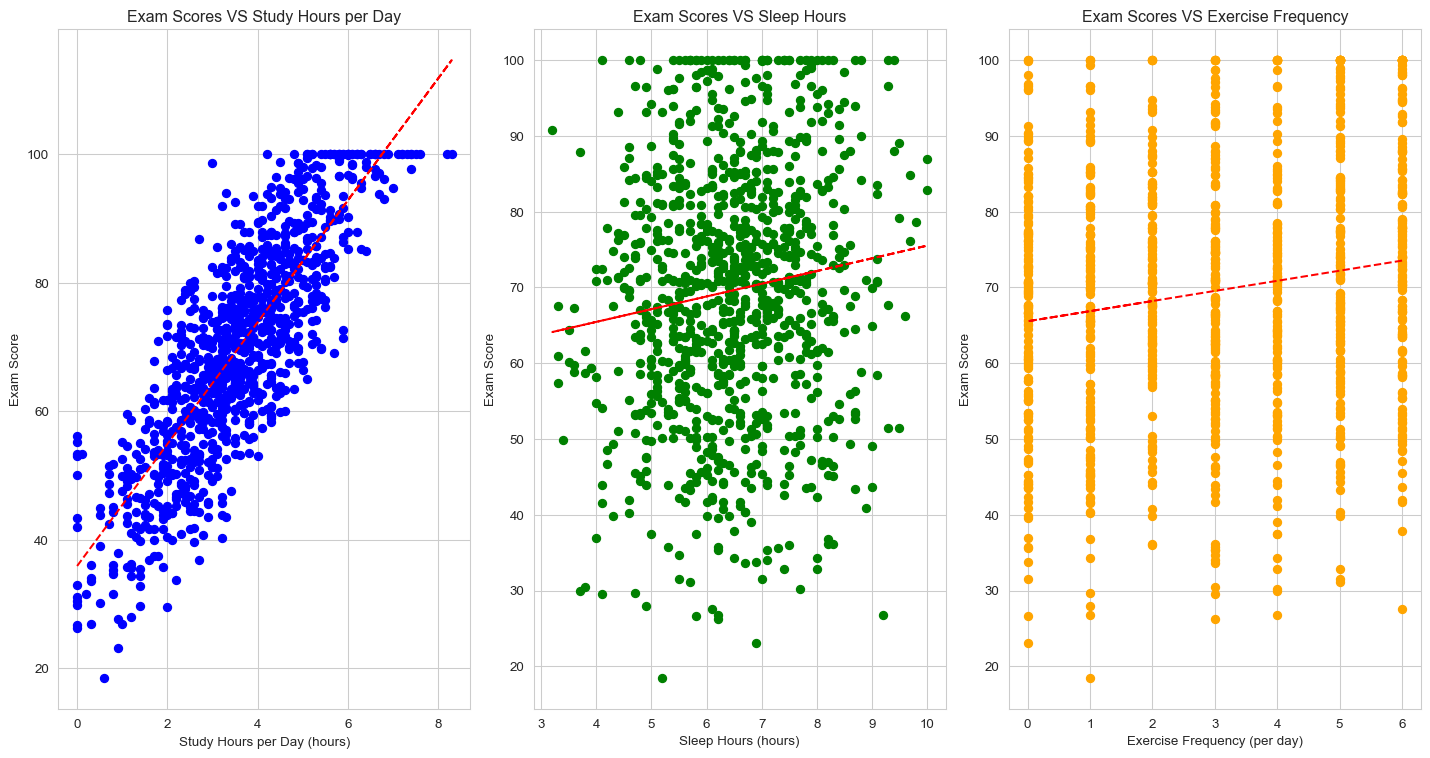

In [7]:
def Scatterplots():
#Import libraries
    df = EDA_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    np= libs["np"]
    Image= libs["Image"]
#Create three scatter plots
# Scatter plot : Subplot (1) Exam score vs Study hours per day
    # Plot Style
    sns.set_style("whitegrid")
    
    # Create figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 8))  # 1 row, 3 columns
    #Extracting data and giving them variables
    x1= df['study_hours_per_day']
    x2=df["sleep_hours"]
    x3=df["exercise_frequency"]
    y=df["exam_score"]

    x1_sorted = np.sort(x1)
    coefficients1 = np.polyfit(x1, y, 1)
    trendline_function = np.poly1d(coefficients1)
    axs[0].plot(x1, trendline_function(x1), color='red', linestyle='--', label='Trendline')
    axs[0].scatter(x1, y, color='blue')
    axs[0].set_xlabel("Study Hours per Day (hours)")
    axs[0].set_ylabel("Exam Score")
    axs[0].set_title("Exam Scores VS Study Hours per Day", fontsize=12)
    correlation1 = np.corrcoef(x1, y)[0, 1]
    print(f"Correlation between study hours per day and exam score: {correlation1:.2f}")
 
    # Subplot(2) Exam score vs Sleep
    x2_sorted = np.sort(x2)
    coefficients2 = np.polyfit(x2, y, 1)
    trendline_function2 = np.poly1d(coefficients2)
    axs[1].plot(x2, trendline_function2(x2), color='red', linestyle='--', label='Trendline')
    axs[1].scatter(x2, y, color='green')
    axs[1].set_xlabel("Sleep Hours (hours)")
    axs[1].set_ylabel("Exam Score")
    axs[1].set_title("Exam Scores VS Sleep Hours", fontsize=12)
    correlation2 = np.corrcoef(x2, y)[0, 1]
    print(f"Correlation between sleep and exam score: {correlation2:.2f}")
    # Subplot (3): Exam score vs Exercise Frequency
    x3_sorted = np.sort(x3)
    coefficients3 = np.polyfit(x3, y, 1)
    trendline_function3 = np.poly1d(coefficients3)
    axs[2].plot(x3, trendline_function3(x3), color='red', linestyle='--', label='Trendline')
    axs[2].scatter(x3, y, color='orange')
    axs[2].set_xlabel("Exercise Frequency (per day)")
    axs[2].set_ylabel("Exam Score")
    axs[2].set_title("Exam Scores VS Exercise Frequency", fontsize=12)
    correlation3 = np.corrcoef(x3, y)[0, 1]
    print(f"Correlation between exercise frequency and exam score: {correlation3:.2f}")
    plt.tight_layout()
    
    fig.savefig('ExamScore_vs_Study_Habits.png') #saving plot as png
    plt.show()
#calling function
Scatterplots()

### Stacked Bar Plot: Comparing the Exam Proportions Represented by Internet Quality Across Genders

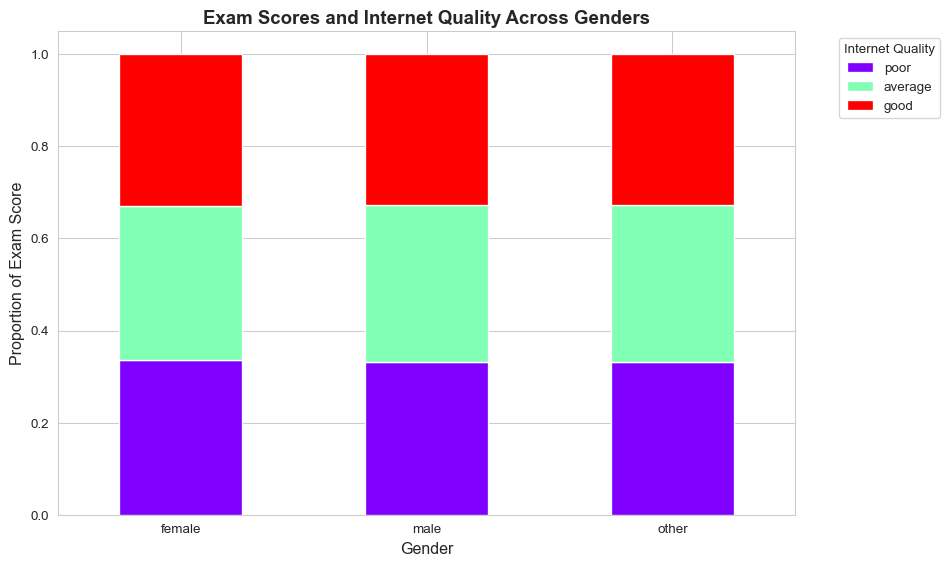

In [8]:
#Stacked bar plot1: 
def stackedbar():
    df = EDA_data()
    if df is None:
        return None 
    
    libs = import_study_libs()
    plt = libs["plt"]
    sns = libs["sns"]
    Image = libs["Image"]

    # order categories for consistency
    ordered_quality = ['poor', 'average', 'good']

    # calculate mean exam score for each gender + internet quality
    grouped_data = (
        df.groupby(['gender', 'internet_quality'])['exam_score']
        .mean()
        .unstack(fill_value=0)
        .reindex(columns=ordered_quality)
    )

    # convert to proportions (100% stacked)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    #create plot
    ax = proportions.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        cmap='rainbow'
    )

    #labels and title
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Proportion of Exam Score', fontsize=12)
    plt.title('Exam Scores and Internet Quality Across Genders',
              fontsize=14, weight='bold')
    plt.legend(title='Internet Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()

    #save and show
    plt.savefig('Exam_Scores_Proportional_Stacked.png', dpi=300)
    plt.show()

#calling function
stackedbar()

### 3D Surface Visualisation: Comparing Exam Scores According to Internet Quality Across Genders

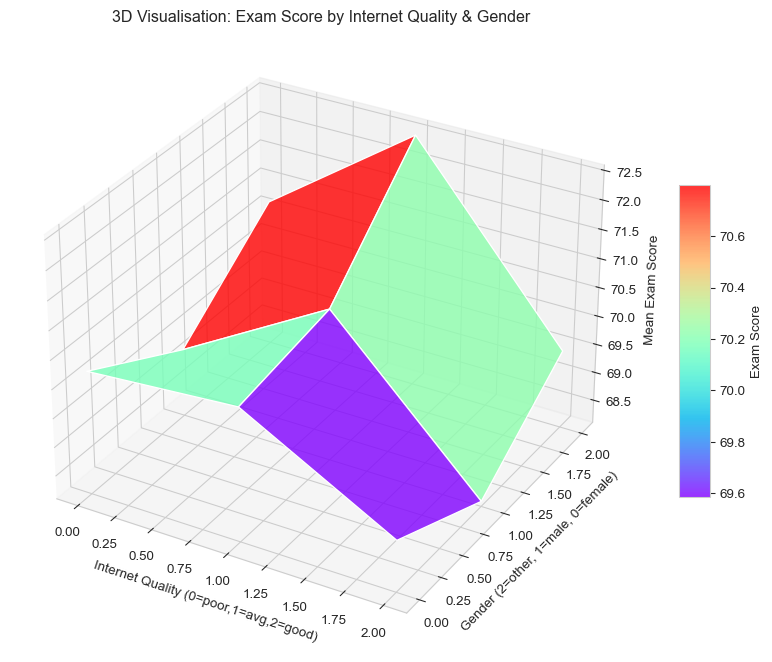

In [9]:
#Internet quality correlation to exam scores
def surface3d_exam():
    libs= import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    np= libs["np"]
    Image= libs["Image"]
    df = EDA_data()
    if df is None:
        return None

    #encode categories numerically
    gender_map = {'other': 2, 'male': 1, 'female': 0}
    quality_map = {'poor': 0, 'average': 1, 'good': 2}
    df['gender_num'] = df['gender'].map(gender_map)
    df['quality_num'] = df['internet_quality'].map(quality_map)

    #pivot to grid
    pivot = df.groupby(['gender_num', 'quality_num'])['exam_score'].mean().unstack()
    X, Y = np.meshgrid(pivot.columns, pivot.index)
    Z = pivot.values

    #create 3D surface plot 
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(X, Y, Z, cmap="rainbow", alpha=0.8)

    ax.set_xlabel("Internet Quality (0=poor,1=avg,2=good)")
    ax.set_ylabel("Gender (2=other, 1=male, 0=female)")
    ax.set_zlabel("Mean Exam Score")
    ax.set_title("3D Visualisation: Exam Score by Internet Quality & Gender")
    plt.tight_layout()

    fig.colorbar(surf, shrink=0.5, aspect=10, label="Exam Score")
    plt.savefig('Exam_Scores_3D.png') #saving plot as png
    plt.show()
#call funciton
surface3d_exam()

### Violin Plot: Comparing Mental Health Across Age groups

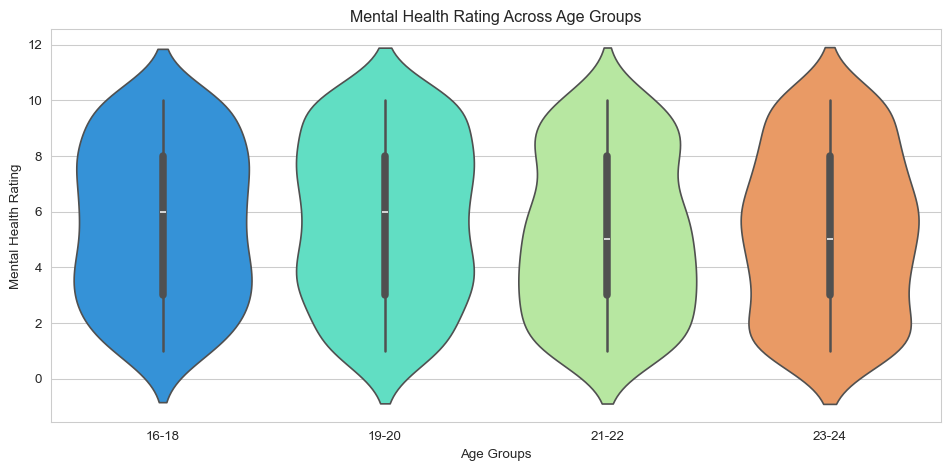

In [10]:
#Violin plot: Mental Health rating per age group: 16-18 years, 19-20 years, 21-22 years and 23-24 years
def violinplot():
    #import data and libraries
    df = EDA_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    pd= libs["pd"]
    Image= libs["Image"]

    #extract data and separate into age groups through the use of bins
    bins = [15, 18, 20, 22, 24]
    labels = ['16-18', '19-20', '21-22', '23-24']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
    
    #create plot
    fig, axes= plt.subplots(figsize=(10,5))
    #make it a violinplot
    sns.violinplot(x= 'age_group', y='mental_health_rating', data=df, ax=axes, palette='rainbow', hue='age_group', legend=False)
    axes.set_title("Mental Health Rating Across Age Groups")
    axes.set_xlabel('Age Groups')
    axes.set_ylabel('Mental Health Rating')
    plt.tight_layout()
    
    #save figure and show
    fig.savefig('mental_health_rating_across_age_groups.png')
    plt.show()
    
#call funtcion
violinplot()


### Outliers Across Age Categories for Mental Health Rating:

In [11]:
def calculate_outliers():
    # import libraries
    df = EDA_data()
    if df is None:
        return None
    
    libs = import_study_libs()
    pd = libs["pd"]
    
    # Extract data and make age groups
    bins = [15, 18, 20, 22, 24]
    labels = ['16-18', '19-20', '21-22', '23-24']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
    
    # Function to detect outliers using IQR
    def find_outliers(group):
        Q1 = group['mental_health_rating'].quantile(0.25)
        Q3 = group['mental_health_rating'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = group[(group['mental_health_rating'] < lower_bound) | 
                         (group['mental_health_rating'] > upper_bound)]
        return outliers
    
    # Apply per age group
    outliers_by_group = df.groupby('age_group').apply(find_outliers)
    
    return outliers_by_group

outliers = calculate_outliers()
print("Outliers detected per age group:")
print(outliers[['age_group', 'mental_health_rating']])
#Calling function
calculate_outliers()

Outliers detected per age group:
Empty DataFrame
Columns: [age_group, mental_health_rating]
Index: []

C:\Users\Dell\AppData\Local\Temp\ipykernel_14328\465186541.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Dell\AppData\Local\Temp\ipykernel_14328\465186541.py:27: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Dell\AppData\Local\Temp\ipykernel_14328\465186541.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

### Heatmap: Multivariate Data Analysis

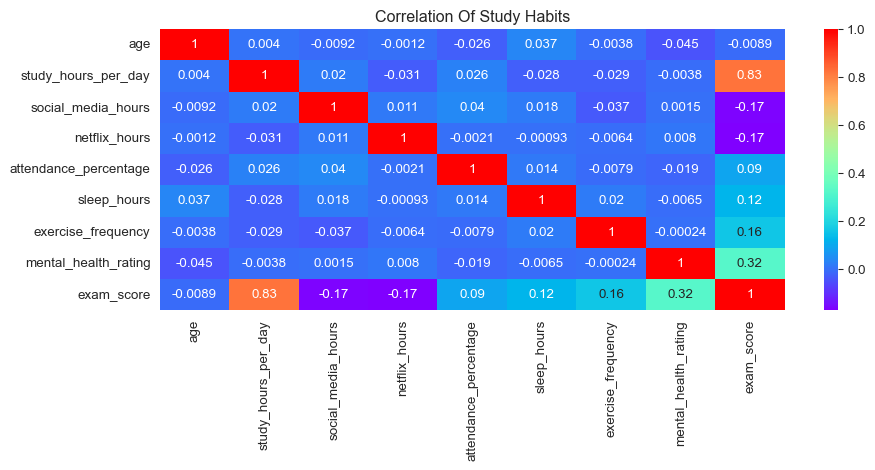

In [12]:
#Heatmap
def heatmap():
    #import data and libraries
    df = EDA_data()
    if df is None:
        return None 
        
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    Image= libs["Image"]

    #cleaning to prep data for the heatmap by removing categorical fields
    heatdata=df.drop(['student_id', 'gender', 'part_time_job', 'diet_quality', 'internet_quality',
                      'parental_education_level', 'extracurricular_participation'], axis='columns')
    
    
    #create plot
    fig, axes= plt.subplots(figsize=(10,5))
    #make it a heatmap
    sns.heatmap(heatdata.corr(), cmap='rainbow', annot= True)
    axes.set_title('Correlation Of Study Habits')
    
    #save and show figure
    plt.tight_layout()
    fig.savefig('Heatmap.png')
    plt.show()

#calling function
heatmap()

### Radar Plot: Comparing AVG Time Spent Across Habits

In [13]:
#Radar Charts
#comparison of time spent in a day
def radarplot():
    #load data
    df = EDA_data()
    if df is None:
        return None 
    #load libraries
    libs = import_study_libs()
    plt= libs["plt"]
    sns= libs["sns"]
    go= libs["go"]
    pio= libs["pio"]
    Image= libs["Image"]
    
    # pio renderer set for radar plot in Quarto but converting to ipynb
    pio.renderers.default = 'notebook'
    # extract data and get the averages
    selected_columns = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'sleep_hours']
    avg_values = df[selected_columns].mean().tolist()
    categories = selected_columns.copy()

    #Closing the loop
    categories += [categories[0]]
    avg_values += [avg_values[0]]

    # Create radar plot
    fig = go.Figure(
    data= go.Scatterpolar(
        r=avg_values,
        theta=categories,
        fill='toself',
        name='Average Time Spent (hours)'))
    
    fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),  # reduce left, right, top, bottom margins
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(avg_values) + 1])
    ),
    title=dict(text='Radar Plot of Average Daily Time Spent', x=0.5),  # center title
    showlegend=True
)

    fig.show()
#call funciton
radarplot()

## Model Building:

The linear regression model and decision tree model were trained for
this project:

##### Linear Regression Model

The following categories were considered in the linear regression model:

-   Age (removed after checking VIF the first time, VIF is too high.
    Also age is not a habit and was excluded due to these reasons.)
-   Study hours
-   Sleep hours
-   Social Media hours
-   Netflix hours
-   Exercise frequency
-   Diet quality
-   Internet quality
-   Mental Health Rating
-   Predicted Exam Score

The categories expected to be most profitable were increased to predict
the impact on exam score. These categories were: sleep hours, study
hours and exercise frequency.

## Linear Regression Model: Built, Test, Evaluated and Compared

In [14]:
#Already encoded and scaled data
#Can train and split directly

def train_LR():
    libs = import_study_libs()
    train_test_split = libs["train_test_split"]
    MinMaxScaler = libs["MinMaxScaler"]

    df = ml_data()
    if df is None:
        return None

    # features and target
    X = df[["attendance_percentage","study_hours_per_day", "social_media_hours", "netflix_hours",
        "sleep_hours", "exercise_frequency", "mental_health_rating", "part_time_job_encoded",
        "extracurricular_encoded", "internet_quality_encoded", "diet_quality_encoded"
    ]]
    y = df["exam_score"]

    #split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.8, test_size=0.2, random_state=100
    )

    #scale numeric features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "X_train_scaled": X_train_scaled,
        "X_test_scaled": X_test_scaled,
        "feature_names": X.columns
    }


#statsmodels OLS for inference
def model_build(X, y):
    libs = import_study_libs()
    sm = libs["sm"]
    pd = libs["pd"]

    #ensure its only numeric
    X = X.apply(pd.to_numeric, errors="coerce")
    y = pd.to_numeric(y, errors="coerce")

    #drop NaNs
    mask = X.notnull().all(axis=1) & y.notnull()
    X, y = X.loc[mask], y.loc[mask]

    #fit OLS
    X_const = sm.add_constant(X)
    lm = sm.OLS(y, X_const).fit()
    print(lm.summary())
    return lm


#VIF Check
def checkVIF(X):
    libs = import_study_libs()
    pd = libs["pd"]
    variance_inflation_factor = libs["variance_inflation_factor"]

    vif_df = pd.DataFrame()
    vif_df["Features"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df["VIF"] = round(vif_df["VIF"], 2)
    return vif_df.sort_values(by="VIF", ascending=False)


#Evaluation with Train vs Test model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    libs = import_study_libs()
    mean_squared_error = libs["mean_squared_error"]
    r2_score = libs["r2_score"]

    #predicted model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #trained model
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    #test model
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        "train_mse": train_mse,
        "train_r2": train_r2,
        "test_mse": test_mse,
        "test_r2": test_r2,
        "train_predictions": y_train_pred,
        "test_predictions": y_test_pred
    }


# call function train_lr
data_dict = train_LR()
print("Train shape:", data_dict["X_train"].shape, "Test shape:", data_dict["X_test"].shape)

#train scikit-learn Linear Regression
libs = import_study_libs()
LinearRegression = libs["LinearRegression"]
lr = LinearRegression()
lr.fit(data_dict["X_train_scaled"], data_dict["y_train"])

#Evaluate with trained vs tested comparison
results = evaluate_model(
    lr,
    data_dict["X_train_scaled"], data_dict["y_train"],
    data_dict["X_test_scaled"], data_dict["y_test"]
)

print("\n--- Model Evaluation ---")
print("Train MSE:", results["train_mse"])
print("Train R²:", results["train_r2"])
print("Test MSE:", results["test_mse"])
print("Test R²:", results["test_r2"])

#Statsmodels OLS summary
X, y = data_dict["X_train"], data_dict["y_train"]
lm = model_build(X, y)
print("OLS Train R²:", lm.rsquared)

#VIF check
print("\n--- Variance Inflation Factors ---")
print(checkVIF(X))

Train shape: (800, 11) Test shape: (200, 11)

--- Model Evaluation ---
Train MSE: 28.589952902206925
Train R²: 0.8995046747076838
Test MSE: 26.368471963300962
Test R²: 0.908012218543634
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     641.2
Date:                Sun, 02 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:33:33   Log-Likelihood:                -2476.4
No. Observations:                 800   AIC:                             4977.
Df Residuals:                     788   BIC:                             5033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        

## Linear Regression: Evaluation Visualisation

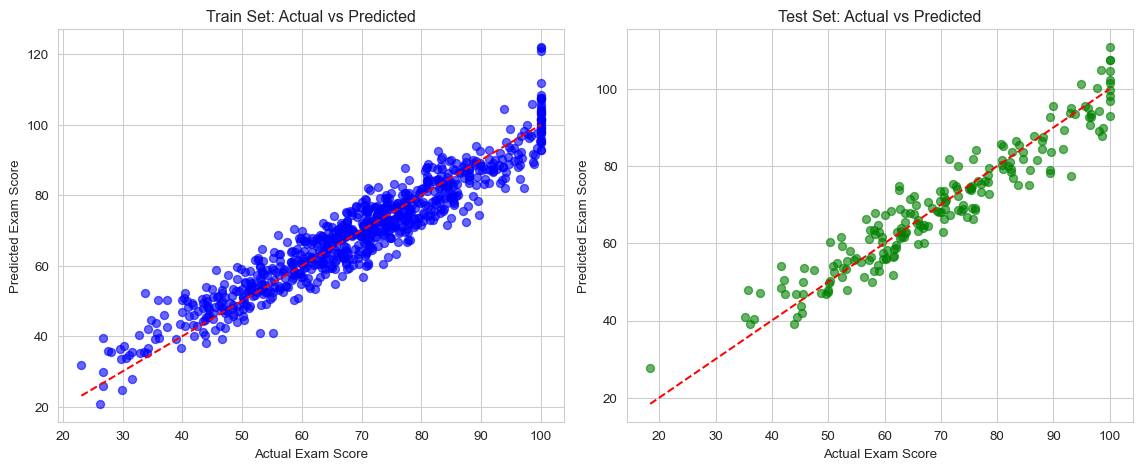

array([<Axes: title={'center': 'Train Set: Actual vs Predicted'}, xlabel='Actual Exam Score', ylabel='Predicted Exam Score'>,
       <Axes: title={'center': 'Test Set: Actual vs Predicted'}, xlabel='Actual Exam Score', ylabel='Predicted Exam Score'>],
      dtype=object)

In [15]:
# New code block: define the visualization function
def plot_model_evaluation(y_train, y_train_pred, y_test, y_test_pred):
    libs = import_study_libs()
    plt = libs["plt"]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    #train set
    axes[0].scatter(y_train, y_train_pred, color="blue", alpha=0.6)
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")
    axes[0].set_title("Train Set: Actual vs Predicted")
    axes[0].set_xlabel("Actual Exam Score")
    axes[0].set_ylabel("Predicted Exam Score")

    #test set
    axes[1].scatter(y_test, y_test_pred, color="green", alpha=0.6)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    axes[1].set_title("Test Set: Actual vs Predicted")
    axes[1].set_xlabel("Actual Exam Score")
    axes[1].set_ylabel("Predicted Exam Score")

    plt.tight_layout()
    plt.show()
    return axes

#predictions
y_train_pred = lr.predict(data_dict["X_train_scaled"])
y_test_pred = lr.predict(data_dict["X_test_scaled"])

#call plot evaluation function
plot_model_evaluation(
    data_dict["y_train"], y_train_pred,
    data_dict["y_test"], y_test_pred
)

# Decision Tree Classifier

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross-validated Best Score: 0.8300000000000001
Test Accuracy: 0.885

Confusion Matrix:
 [[117   7]
 [ 16  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       124
           1       0.90      0.79      0.84        76

    accuracy                           0.89       200
   macro avg       0.89      0.87      0.87       200
weighted avg       0.89      0.89      0.88       200

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross-validated Best Score: 0.8300000000000001
Test Accuracy: 0.885

Confusion Matrix:
 [[117   7]
 [ 16  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       124
           1       0.90      0.79      0.84        76

    accuracy                           0.89       200
   macro avg       0.

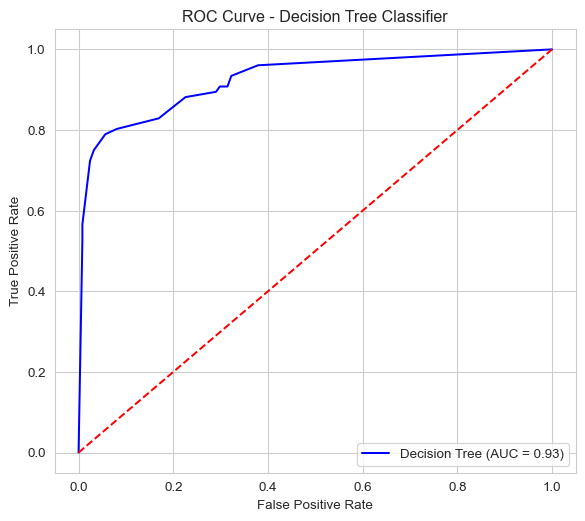

Decision Tree AUC: 0.9258276740237691

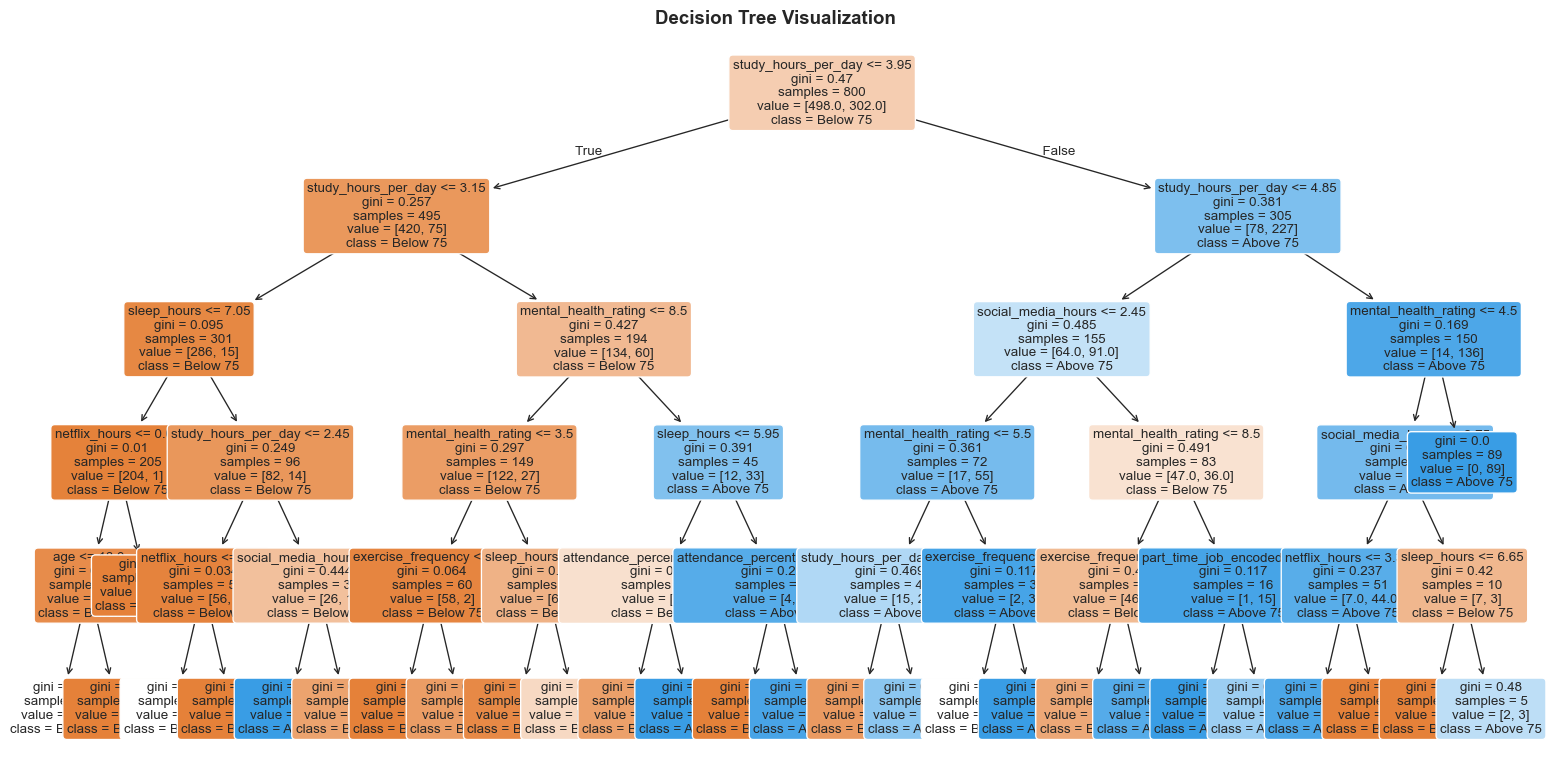

In [16]:
def optimise_decision_tree():
    #import libraries
    libs = import_study_libs()
    pd = libs["pd"]
    train_test_split = libs["train_test_split"]
    DecisionTreeClassifier = libs["DecisionTreeClassifier"]
    GridSearchCV = libs["GridSearchCV"]
    accuracy_score = libs["accuracy_score"]
    confusion_matrix = libs["confusion_matrix"]
    classification_report = libs["classification_report"]

    #load encoded dataset
    df = ml_data()

    #create binary target: 1 if exam_score >= 75, else 0
    df["above_75"] = (df["exam_score"] >= 75).astype(int)

    #features and target
    X = df.drop(columns=["exam_score", "above_75"])
    y = df["above_75"]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Define parameter grid
    param_grid = {
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=1
    )

    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-validated Best Score:", grid_search.best_score_)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return best_model, grid_search, X_train, X_test, y_train, y_test
best_tree, grid_search, X_train, X_test, y_train, y_test = optimise_decision_tree()
#ROC Curve
def plot_tree_roc(model, X_test, y_test):
    libs = import_study_libs()
    roc_curve = libs["roc_curve"]
    roc_auc_score = libs["roc_auc_score"]
    plt = libs["plt"]

    # y_test is already binary (0 = below 75, 1 = above 75)
    y_true_binary = y_test  

    # Predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_binary, y_probs)
    auc = roc_auc_score(y_true_binary, y_probs)

    # Plot
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color="blue", label=f"Decision Tree (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Decision Tree Classifier")
    plt.legend(loc="lower right")
    plt.show()

    print("Decision Tree AUC:", auc)
    return auc
    
best_tree, grid_search, X_train, X_test, y_train, y_test = optimise_decision_tree()
auc_score = plot_tree_roc(best_tree, X_test, y_test)


def visualize_tree(model, feature_names, class_names):
    libs= import_study_libs()
    plt= libs["plt"]
    plot_tree= libs["plot_tree"]
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title("Decision Tree Visualization", fontsize=14, weight="bold")
    plt.show()

# Call it with your best model
feature_names = X_train.columns
class_names = ["Below 75", "Above 75"]

visualize_tree(best_tree, feature_names, class_names)

## Compare Machine Models: ROC Curve Comparison

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross-validated Best Score: 0.8300000000000001
Test Accuracy: 0.885

Confusion Matrix:
 [[117   7]
 [ 16  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       124
           1       0.90      0.79      0.84        76

    accuracy                           0.89       200
   macro avg       0.89      0.87      0.87       200
weighted avg       0.89      0.89      0.88       200


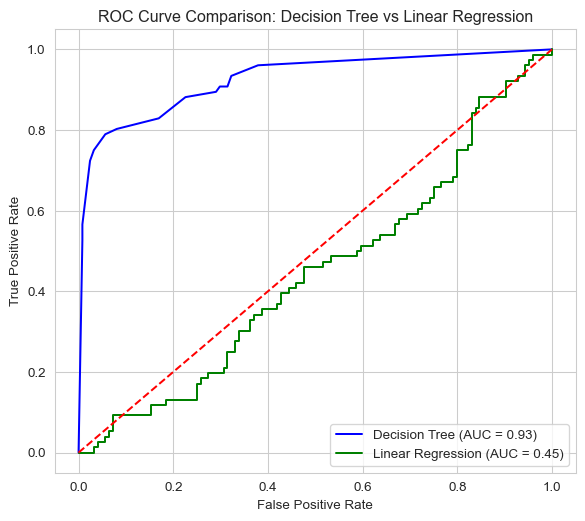

In [17]:
def compare_models_roc(lr_model, tree_model, X_test_scaled, X_test, y_test_binary):
    libs = import_study_libs()
    roc_curve = libs["roc_curve"]
    roc_auc_score = libs["roc_auc_score"]
    plt = libs["plt"]

    # Decision Tree probabilities
    y_probs_tree = tree_model.predict_proba(X_test)[:, 1]
    fpr_tree, tpr_tree, _ = roc_curve(y_test_binary, y_probs_tree)
    auc_tree = roc_auc_score(y_test_binary, y_probs_tree)

    #Linear Regression predictions for continous exam scores
    y_pred_lr = lr_model.predict(X_test_scaled)
    fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_pred_lr)
    auc_lr = roc_auc_score(y_test_binary, y_pred_lr)

    # plot both curves 
    plt.figure(figsize=(7, 6))
    plt.plot(fpr_tree, tpr_tree, color="blue", label=f"Decision Tree (AUC = {auc_tree:.2f})")
    plt.plot(fpr_lr, tpr_lr, color="green", label=f"Linear Regression (AUC = {auc_lr:.2f})")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison: Decision Tree vs Linear Regression")
    plt.legend(loc="lower right")
    plt.show()

#calling best parameters for curve
best_tree, grid_search, X_train, X_test, y_train, y_test = optimise_decision_tree()

# y_test is already binary 
compare_models_roc(
    lr_model=lr,
    tree_model=best_tree,
    X_test_scaled=data_dict["X_test_scaled"],
    X_test=X_test,
    y_test_binary=y_test   #binary labels
)